# Implementation of Section 4.3
Sensitivity analysis

In [1]:
import data_preparation
import custom_func
from model import Model
from model_w import ModelW
from draw_network import DrawNetworkDiagram

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
spill_data = pd.read_excel('../data/processed/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()
potential_station_data = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
potential_station_data = potential_station_data.iloc[[0, 4,7, 10, 11, 18]] # if we want to keep current facility setup in the set
station_data = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations', header=0).copy()
current_station_data = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current', header=0).copy()

current_input_param = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current input param', header=0).copy()
input_parameters = pd.read_excel('../data/raw/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='Estimated parameters', header=0).copy()
sensitivity_dataR = gpd.read_file('../data/gis map/ArcGIS_data/Sensitivity_data/Sensitivity_data5.shp').copy()

In [4]:
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
spill_coord.columns = ['St_Latitude', 'St_Longitude']

In [5]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

['s1', 's5', 's8', 's11', 's12', 's19']


# Table 5 

## 200 spills

In [ ]:
spill_data200 = pd.read_csv('../data/processed/data_200_oil_spills.csv')

In [ ]:
# Spill data processing
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(station_data, spill_data, input_parameters)
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
coordinates_st = custom_func.extract_station_coordinate(station_data)
SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)

In [ ]:
# normalize  # (x_0-x_min)/(x_max-x_min)
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))
Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))


In [ ]:
NumberStMaxL = [15, 12, 8, 5, 4, 2]
number_of_spillsL = [200, 200, 200, 200, 200, 200]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]
DistanceMax = 10

In [ ]:
for i in range(len(NumberStMaxL)):
    model01, select, deploy, mvars, names, values, objValues, \
            spill_df, station_df, cover_1s, select_1s, deploy_1s, MeanResponseTime, coverage_percentage, assignment  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[i], Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)
    select_1sL.append(select_1s.index)
    coverage_percentageL.append(coverage_percentage)
    MeanResponseTimeL.append(MeanResponseTime)


In [ ]:
determine_number_of_facilities = pd.DataFrame(index=range(len(NumberStMaxL)),
                                              columns=['Number of facilities', 'Number of spills','Open facility', 'Coverage (%)', 'Mean Response time (in hours)', 'Cost investment (in million CAD)'])
for i in range(6):
    determine_number_of_facilities.iloc[i,0] = NumberStMaxL[i]
    determine_number_of_facilities.iloc[i,1] = number_of_spillsL[i]
    determine_number_of_facilities.iloc[i,2] = select_1sL[i]
    determine_number_of_facilities.iloc[i,3] = coverage_percentageL[i]
    determine_number_of_facilities.iloc[i,4] = MeanResponseTimeL[i]
    determine_number_of_facilities.iloc[i,5] = 0
determine_number_of_facilities

## 100 Spills

In [ ]:
NumberStMaxL = [15, 12, 8, 5, 4, 2]
number_of_spillsL = [100, 100,100, 100,100, 100]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]

In [ ]:
for i in range(6):
    model01, select, deploy, mvars, names, values, objValues, \
            spill_df, station_df, cover_1s, select_1s, deploy_1s, MeanResponseTime, coverage_percentage, assignment  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[i], Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)
    select_1sL.append(select_1s.index)
    coverage_percentageL.append(coverage_percentage)
    MeanResponseTimeL.append(MeanResponseTime)


In [ ]:
determine_number_of_facilities = pd.DataFrame(index=range(6),
                                              columns=['Number of facilities', 'Number of spills','Open facility', 'Coverage (%)', 'Mean Response time (in hours)', 'Cost investment (in million CAD)'])
for i in range(6):
    determine_number_of_facilities.iloc[i,0] = NumberStMaxL[i]
    determine_number_of_facilities.iloc[i,1] = number_of_spillsL[i]
    determine_number_of_facilities.iloc[i,2] = select_1sL[i]
    determine_number_of_facilities.iloc[i,3] = coverage_percentageL[i]
    determine_number_of_facilities.iloc[i,4] = MeanResponseTimeL[i]
    determine_number_of_facilities.iloc[i,5] = 0
determine_number_of_facilities

# Fig8: Sensitivity vs weight vector


# Fig9: Emphasize sensitivity

In [ ]:
BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [0.25, 1000*0.25, 0.25, 10**-4*0.25, 10**-2*0.25, 10 * 0.25]
QuantityMin = 2

In [ ]:
DistanceMaxL = [5, 7, 8, 10, 11, 12, 15, 20]
NumberStMaxL = [2, 5, 8, 10, 12]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]
max_distance_sensitivity_L = []

In [ ]:
# Model
for i in range(len(DistanceMaxL)):
    for j in range(len(NumberStMaxL)):
        model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
            spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
            = ModelW.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
                  Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[j], Distance, Distance_n,
                  W, QuantityMin, DistanceMaxL[i], Cf_s, CostU, Budget,
                  BigM, MaxFO)
        select_1sL.append(select_1s_m4b.index)
        coverage_percentageL.append(coverage_percentage_m4b)
        MeanResponseTimeL.append(MeanResponseTime_m4b)
        max_distance_sensitivity_L.append([DistanceMaxL[i], NumberStMaxL[j], MeanResponseTime_m4b])

In [ ]:
model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
    spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
    = ModelW.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[1], Distance, Distance_n,
          W, QuantityMin, DistanceMaxL[0], Cf_s, CostU, Budget,
          BigM, MaxFO)
select_1sL.append(select_1s_m4b.index)
coverage_percentageL.append(coverage_percentage_m4b)
MeanResponseTimeL.append(MeanResponseTime_m4b)
max_distance_sensitivity_L.append([DistanceMaxL[0], NumberStMaxL[1], MeanResponseTime_m4b])

# Draw the network
assignment_line_m4b = DrawNetworkDiagram.draw_network_diagram(DistanceMaxL[0], NumberStMaxL[1], Sensitivity_R, spill_df_m4b, station_df_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b, deploy_1s_m4b, select_1s_m4b, current_vs_proposed)

In [ ]:
max_distance_sensitivity_df = pd.DataFrame(max_distance_sensitivity_L,
                                              columns=['Max Distance Travelled','Max Number of Station','Mean Response Time'])
max_distance_sensitivity_df

In [ ]:
sns.lineplot(data = max_distance_sensitivity_df, x='Max Distance Travelled', y='Mean Response Time', hue='Max Number of Station')

## Emphasize distance metric

In [ ]:
W = [100*0.25, 0.25, 100*0.25, 10**-4*0.25, 10**-2*0.25, 10 * 0.25]
# we should emphasize spill size as well when trying to min distance. otherwise, it will minimize distance, & just assign nothing
# dropping 100 from sensitivity weight & add in distance min 100*
QuantityMin = 2

In [ ]:
DistanceMaxL = [5, 7, 8, 10, 11, 12, 15, 20]
NumberStMaxL = [5, 8, 10, 12]
select_1sL =[]
coverage_percentageL =[]
MeanResponseTimeL =[]
max_distance_sensitivity_L = []
pareto_front_max_obj = []
pareto_front_min_obj = []

In [ ]:
# Model
for i in range(len(DistanceMaxL)):
    for j in range(len(NumberStMaxL)):
        model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
            spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
            = ModelW.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
                  Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMaxL[j], Distance, Distance_n,
                  W, QuantityMin, DistanceMaxL[i], Cf_s, CostU, Budget,
                  BigM, MaxFO)
        select_1sL.append(select_1s_m4b.index)
        coverage_percentageL.append(coverage_percentage_m4b)
        MeanResponseTimeL.append(MeanResponseTime_m4b)
        max_distance_sensitivity_L.append([DistanceMaxL[i], NumberStMaxL[j], MeanResponseTime_m4b])

        assignment_line_m4b = DrawNetworkDiagram.draw_network_diagram(DistanceMaxL[i], NumberStMaxL[j], Sensitivity_R, spill_df_m4b, station_df_m4b, MeanResponseTime_m4b,      coverage_percentage_m4b, assignment_m4b, deploy_1s_m4b, select_1s_m4b, current_vs_proposed)

In [ ]:
max_distance_sensitivity_df = pd.DataFrame(max_distance_sensitivity_L,
                                              columns=['Max Distance Travelled','Max Number of Station','Mean Response Time'])
max_distance_sensitivity_df

In [ ]:
sns.lineplot(data = max_distance_sensitivity_df, x='Max Distance Travelled', y='Mean Response Time', hue='Max Number of Station')

In [ ]:

BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [100*0.25, 0.25, 100*0.25, 10**-4*0.25, 10**-2*0.25, 10 * 0.25]
# we should emphasize spill size as well when trying to min distance. otherwise, it will minimize distance, & just assign nothing
# dropping 100 from sensitivity weight & add in distance min 100*
QuantityMin = 2
# NumberStMax_m4b = 5
current_vs_proposed = 'proposed'

DistanceMax = 10
NumberStMax = 5

In [ ]:
# W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
# w1 = [.25, .5, .75]; w2 = [.25, .5, .75]; w3 = [.25, .5, .75];
w1 = [.25, 10, 100]; w2 = [10**-2, .25, 10, 100, 10**4]; w3 = [10**-2, .25, 1, 10, 100]
w4 = [.25, .75]; w5 = .25; w6 = .25; w7 = .25; w8 = .25

weight_sensi_L = []
MeanResponseTime_m4bL=[]
coverage_percentage_m4bL=[]
objValues_m4bL = []

In [ ]:
#import model

## Run Model 4(b)

In [ ]:
# Model
for i in range(len(w1)):
    for j in range(len(w2)):
        for k in range(len(w3)):
            for n in range(len(w4)):
                W = [w1[i], w2[j], w3[k], w4[n], w5, w6, w7, w8]
                model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
                    spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
                    = Model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
                          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax, Distance, Distance_n,
                          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
                          BigM, MaxFO)

                #coverage_percentage_m4bL.append(coverage_percentage_m4b)
                #MeanResponseTime_m4bL.append(MeanResponseTime_m4b)
                #objValues_m4bL.append(objValues_m4b[1::2][1]) # negative value of cost for [0] starting guess issue i think
                weight_sensi_L.append([w1[i], w2[j], w3[k], w4[n], w5, w6, w7, w8,
                                       coverage_percentage_m4b, MeanResponseTime_m4b, objValues_m4b[1::2][1]]) # coverage of sensitive area ++

In [ ]:
weight_sensi_L


In [ ]:
data_weight_pcp = pd.DataFrame(weight_sensi_L)
data_weight_pcp.columns = ['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'coverage_percentage', 'MeanResponseTime', 'objValues2']
data_weight_pcp

In [ ]:
data_weight_pcp.info()

In [ ]:
data_weight_pcp1 = data_weight_pcp[['w1', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'coverage_percentage']].copy()
data_weight_pcp2 = data_weight_pcp[['w1', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'MeanResponseTime']].copy()
data_weight_pcp3 = data_weight_pcp[['w1',  'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'objValues2']].copy()

## Fig8 PCP

In [ ]:
data_weight_pcp = pd.read_excel('Outputs/data_weight_pcp.xlsx')
data_co_sorted = data_weight_pcp.sort_values(['coverage_percentage'], ascending=False)
data_MeanRT_sorted = data_weight_pcp.sort_values(['MeanResponseTime'], ascending=False)
data_cost_sorted = data_weight_pcp.sort_values(['objValues2'], ascending=False)

In [ ]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(2,3))
kwargs = {'lw':0.6} #'alpha':1,
ax = pd.plotting.parallel_coordinates(data_co_sorted, class_column='coverage_percentage',
                                 cols=['w1','w2', 'w3'],
                                 colormap=plt.get_cmap('hot'),
                                axvlines=False,
                                 **kwargs                      )
plt.yscale("log")
plt.ylabel('Coverage', fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$'])
plt.tight_layout()
ax.legend(bbox_to_anchor=(1,1), fontsize = 8)
ax.grid(False)
fig.savefig(f'Outputs/Fig8a PCP.png', transparent=False, dpi=400, bbox_inches = "tight")

In [ ]:
fig, ax = plt.subplots(figsize=(2,3))
kwargs = {'lw':0.6} #'alpha':1,
ax = pd.plotting.parallel_coordinates(data_MeanRT_sorted, class_column='MeanResponseTime',
                                 cols=['w1','w2', 'w3'],
                                 colormap=plt.get_cmap('hot'),axvlines=False,
                                 **kwargs                      )
plt.yscale("log")
plt.ylabel('Mean Response Time', fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$'])
plt.tight_layout()
ax.legend(bbox_to_anchor=(1,1), fontsize = 8)
ax.grid(False)
fig.savefig(f'Outputs/Fig8b PCP.png', transparent=False, dpi=400, bbox_inches = "tight")

fig, ax = plt.subplots(figsize=(2,3))
kwargs = {'lw':0.6} #'alpha':1,
ax = pd.plotting.parallel_coordinates(data_cost_sorted, class_column='objValues2',
                                 cols=['w1','w2', 'w3'],
                                 colormap=plt.get_cmap('hot'),axvlines=False,
                                 **kwargs                      )
plt.yscale("log")
plt.ylabel('Objective 2', fontsize=10)
plt.yticks(fontsize=10)
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$'])
plt.tight_layout()
ax.legend(bbox_to_anchor=(1,1), fontsize = 7)
ax.grid(False)
fig.savefig(f'Outputs/Fig8c PCP.png', transparent=False, dpi=400, bbox_inches = "tight")

# Fig10 
Boxplot - compare coverage, cost, time for current vs proposed

Creating 10 sets of data

In [ ]:
# read csv file for newly created 10 sets
spill_data = pd.read_csv('Inputs/10 Sets of spills/setA_data_100_oil_spills.csv')
potential_station_data = pd.read_excel('Inputs/10 Sets of spills/data_oil_spill_resource_allocation_Arctic_2023_setA.xlsx', sheet_name='stations', header=0).copy()
input_parameters = pd.read_excel('Inputs/10 Sets of spills/data_oil_spill_resource_allocation_Arctic_2023_setA.xlsx', sheet_name='Estimated parameters', header=0).copy()

In [ ]:
# Data Extraction
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']


coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
spill_coord.columns = ['St_Latitude', 'St_Longitude']
display(spill_coord)

In [ ]:
# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

In [ ]:
NumberStMax_m4b = 5
DistanceMax = 10
current_vs_proposed = 'proposed'

In [ ]:
# Model
model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
        spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
    = Model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4b, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

In [ ]:
# Draw the network
assignment_line_m4b = DrawNetworkDiagram.draw_network_diagram(DistanceMax, NumberStMax_m4b, Sensitivity_R, spill_df_m4b, station_df_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b, deploy_1s_m4b, select_1s_m4b, current_vs_proposed)

In [ ]:
boxplot_df = pd.DataFrame(index=range(10),
                          columns=['Set of 100 spills', 'Coverage (%)','Mean Respone Time', 'Cost Objective value'])
# boxplot_df

## Run without for loop

In [ ]:
# Load data
# read csv file for newly created 10 sets
spill_data = pd.read_csv('Inputs/10 Sets of spills/setJ_data_100_oil_spills.csv')
potential_station_data = pd.read_excel('Inputs/10 Sets of spills/data_oil_spill_resource_allocation_Arctic_2023_setJ.xlsx', sheet_name='stations', header=0).copy()
input_parameters = pd.read_excel('Inputs/10 Sets of spills/data_oil_spill_resource_allocation_Arctic_2023_setJ.xlsx', sheet_name='Estimated parameters', header=0).copy()

# Data Extraction
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']
coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
spill_coord.columns = ['St_Latitude', 'St_Longitude']
display(spill_coord)

# Input param
Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
= data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
# normalize
SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
# (x_0-x_min)/(x_max-x_min)
Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

NumberStMax_m4b = 5
DistanceMax = 10
current_vs_proposed = 'proposed'

# Model
model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
        spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
    = Model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
          Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4b, Distance, Distance_n,
          W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
          BigM, MaxFO)

## Save Output

Performance metric of proposed facility layout (model 4b)

In [ ]:
SetName = 'Set J'
if SetName == 'Set J':
    i = 9
    boxplot_df.iloc[i,0] = SetName
    boxplot_df.iloc[i,1] = coverage_percentage_m4b
    boxplot_df.iloc[i,2] = MeanResponseTime_m4b
    boxplot_df.iloc[i,3] = objValues_m4b[1::2][0]
boxplot_df

In [ ]:
boxplot_df

In [ ]:
## model 3 (based on current facility location)

In [ ]:
boxplot_df.to_csv('Outputs/boxplot_data_proposed.csv')

## Current facility location - model 3 (for 10 dataset) using for loop

In [ ]:
boxplot_df_model3 = pd.DataFrame(index=range(10),
                          columns=['Set of 100 spills', 'Coverage (%)','Mean Respone Time', 'Cost Objective value'])
# boxplot_df

In [ ]:
SetNameL = ['setA', 'setB', 'setC', 'setD', 'setE', 'setF', 'setG', 'setH', 'setI', 'setJ']

NumberStMax_m3 = 6
DistanceMax = 10
current_vs_proposed = 'current'

for SetName in SetNameL:
    # Load data
    # read csv file for newly created 10 sets
    spill_data = pd.read_csv(f'Inputs/10 Sets of spills/{SetName}_data_100_oil_spills.csv')

    coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
    spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
    spill_coord.columns = ['St_Latitude', 'St_Longitude']

    # Input param
    Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
    = data_preparation.generate_input_data(current_station_data, spill_data, current_input_param)

    SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
    Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
    # normalize
    SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
    Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

    Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
    # (x_0-x_min)/(x_max-x_min)
    Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))

    # Modeling based on current setup
    model_03, select_m3, deploy_m3, mvars_m3, names_m3, values_m3, objValues_m3, \
            spill_df_m3, station_df_m3, cover_1s_m3, select_1s_m3, deploy_1s_m3, MeanResponseTime_m3, coverage_percentage_m3, assignment_m3  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m3, Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)

    if SetName == 'setA':
        i = 0
    elif SetName == 'setB':
        i = 1
    elif SetName == 'setC':
        i = 2
    elif SetName == 'setD':
        i = 3
    elif SetName == 'setE':
        i = 4
    elif SetName == 'setF':
        i = 5
    elif SetName == 'setG':
        i = 6
    elif SetName == 'setH':
        i = 7
    elif SetName == 'setI':
        i = 8
    elif SetName == 'setJ':
        i = 9
    boxplot_df_model3.iloc[i,0] = SetName
    boxplot_df_model3.iloc[i,1] = coverage_percentage_m3
    boxplot_df_model3.iloc[i,2] = MeanResponseTime_m3
    boxplot_df_model3.iloc[i,3] = objValues_m3[1::2][0]

boxplot_df_model3

In [ ]:
boxplot_df_model3.to_csv('Outputs/boxplot_df_model3.csv')

## Draw Boxplot

In [ ]:
data_compare = pd.read_excel('Outputs/Boxplot_data.xlsx', sheet_name='Sheet1', skiprows=[0])
data_compare.info()
coverage_df_stacked = data_compare[['Current','Proposed']].copy().stack().reset_index()
coverage_df_stacked.columns = ['Index','Facility','Coverage']
cost_df_stacked = data_compare[['Current.1','Proposed.1']].copy().stack().reset_index()
cost_df_stacked.columns = ['Index','Facility','Cost']

time_df_stacked = data_compare[['Current.2','Proposed.2']].copy().stack().reset_index()
time_df_stacked.columns = ['Index','Facility','Response Time']

In [ ]:
sns.set_theme(style="white")
# plt.rcParams["figure.figsize"] = [7.00, 4]
plt.rcParams['axes.edgecolor'] = 'lightgray'

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(6,4))
alpha_val = 0.7

sns.boxplot(data= coverage_df_stacked, ax=ax1, x='Facility', y='Coverage',
            boxprops=dict(alpha=alpha_val), palette=["g", "yellow"]).set(ylabel='Spill Coverage (%)')
sns.stripplot(data= coverage_df_stacked, ax=ax1, x='Facility', y='Coverage',
              alpha=alpha_val)
sns.boxplot(data= cost_df_stacked, ax=ax2, x='Facility', y='Cost',
            boxprops=dict(alpha=alpha_val), palette=["g", "yellow"]).set(ylabel='Cost Objective Value')
sns.stripplot(data= cost_df_stacked, ax=ax2, x='Facility', y='Cost',
              alpha=alpha_val)
sns.boxplot(data= time_df_stacked, ax=ax3, x='Facility', y='Response Time',
            boxprops=dict(alpha=alpha_val), palette=["g", "yellow"]).set(ylabel='Mean Response Time (in hr)')
sns.stripplot(data= time_df_stacked, ax=ax3, x='Facility', y='Response Time',
              alpha=alpha_val)


ax1.set_xticklabels(['Current', 'Proposed']); ax1.set_xlabel(''); ax1.tick_params(axis='x', labelrotation=30)
ax2.set_xticklabels(['Current', 'Proposed']); ax2.set_xlabel(''); ax2.tick_params(axis='x', labelrotation=30)
ax3.set_xticklabels(['Current', 'Proposed']); ax3.set_xlabel(''); ax3.tick_params(axis='x', labelrotation=30)
plt.tight_layout()

# plt.axis('off')
plt.show()
fig.savefig('Outputs/Fig10 boxplot.png', transparent=False, dpi= 500)

# Fig 11:  Pareto Front

## Create data

In [6]:
## Current facility location - model 4b (for 10 dataset) using for loop
pareto_front_df_model4b = pd.DataFrame(index=range(10),
                                 columns=['Max coverage',
                                          'Min cost'])
SetNameL = ['setA', 'setB', 'setC', 'setD', 'setE', 'setF', 'setG', 'setH', 'setI', 'setJ']
NumberStMax_m4b = 5
DistanceMax = 10
current_vs_proposed = 'proposed'
BigM = 10**20
current_vs_proposed = 'proposed' # current
MaxFO = 1
Budget = 10**12
W = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
# we should emphasize spill size as well when trying to min distance. otherwise, it will minimize distance, & just assign nothing
# dropping 100 from sensitivity weight & add in distance min 100*
QuantityMin = 2


# Data Extraction
coordinates_potential_st = custom_func.extract_station_coordinate(potential_station_data)
potential_st_coord = pd.DataFrame(coordinates_potential_st[1]).T.reset_index().set_index('index')
potential_st_coord.columns = ['St_Latitude', 'St_Longitude']

In [8]:
for SetName in SetNameL:
    # Load data
    # read csv file for newly created 10 sets
    spill_data = pd.read_csv(f'../data/processed/10 Sets of spills/{SetName}_data_100_oil_spills.csv')

    coordinates_spill = custom_func.extract_spill_coordinate(spill_data)
    spill_coord = pd.DataFrame(coordinates_spill[1]).T.reset_index().set_index('index')
    spill_coord.columns = ['St_Latitude', 'St_Longitude']


    # Input param
    Stations, OilSpills, ResourcesD, Demand, Availability, Eff, Distance, TimeR, Cf_s, CostU \
    = data_preparation.generate_input_data(potential_station_data, spill_data, input_parameters)

    SizeSpill = SizeSpill_R = list(spill_data['Spill size']).copy()
    Sensitivity_R = custom_func.calculate_sensitivity(coordinates_spill[0], sensitivity_dataR)
    # normalize
    SizeSpill_n = dict(zip(OilSpills, custom_func.normalize(SizeSpill_R, min(SizeSpill_R), max(SizeSpill_R))))
    Sensitivity_n = dict(zip(OilSpills, custom_func.normalize(Sensitivity_R, min(Sensitivity_R), max(Sensitivity_R))))

    Distance_n = dict(zip(Distance.keys(), custom_func.normalize(Distance.values(), min(Distance.values()), max(Distance.values()))))
    # (x_0-x_min)/(x_max-x_min)
    Effectiveness_n = dict(zip(Eff.keys(), custom_func.normalize(Eff.values(), min(Eff.values()), max(Eff.values()))))


    # Model
    model_04b, select_m4b, deploy_m4b, mvars_m4b, names_m4b, values_m4b, objValues_m4b, \
            spill_df_m4b, station_df_m4b, cover_1s_m4b, select_1s_m4b, deploy_1s_m4b, MeanResponseTime_m4b, coverage_percentage_m4b, assignment_m4b  \
        = Model.solve(Stations, OilSpills, ResourcesD, coordinates_potential_st, coordinates_spill, SizeSpill, SizeSpill_n,
              Demand, Sensitivity_R, Sensitivity_n, Eff, Effectiveness_n, Availability, NumberStMax_m4b, Distance, Distance_n,
              W, QuantityMin, DistanceMax, Cf_s, CostU, Budget,
              BigM, MaxFO)

    if SetName == 'setA':
        i = 0
    elif SetName == 'setB':
        i = 1
    elif SetName == 'setC':
        i = 2
    elif SetName == 'setD':
        i = 3
    elif SetName == 'setE':
        i = 4
    elif SetName == 'setF':
        i = 5
    elif SetName == 'setG':
        i = 6
    elif SetName == 'setH':
        i = 7
    elif SetName == 'setI':
        i = 8
    elif SetName == 'setJ':
        i = 9
    pareto_front_df_model4b.iloc[i, 0] = objValues_m4b[0::2]
    pareto_front_df_model4b.iloc[i, 1] = objValues_m4b[1::2]
    pareto_front_df_model4b.iloc[i, 1] = SetName


pareto_front_df_model4b

['s1', 's5', 's8', 's11', 's12', 's19']
len of OilSpills:  100
--------------MIP-moo--------
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-03
Set parameter PoolSolutions to value 1024
Set parameter PoolGap to value 0.8
Set parameter LogFile to value "../models/model_moo(May 03,0119).log"
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (mac64[arm] - Darwin 23.2.0 23C71)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 495 rows, 386 columns and 927 nonzeros
Model fingerprint: 0x1994b526
Variable types: 285 continuous, 101 integer (101 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+25]
  Objective range  [2e-02, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

----------------------------------------------------------------------

,Max coverage,Min cost
0,"[983.2685479933318, 983.283465189947]",setA
1,"[861.444168985726, 861.444168985726]",setB
2,"[1058.6116859761194, 1058.6116859761194]",setC
3,"[1030.0745691816767, 1030.0806106217494]",setD
4,"[857.3878790045762, 857.3974809737064]",setE
5,"[964.4438154837482, 964.4438154837482]",setF
6,"[1014.2830940235084, 1014.3042527837018]",setG
7,"[957.4242961352938, 957.4264645494095]",setH
8,"[1057.6977514510677, 1057.6977514510677]",setI
9,"[1040.4343760991133, 1040.4343760991133]",setJ


In [9]:
pareto_front_df_model4b.to_csv('../data/processed/pareto_front_df_model4b.csv')
pareto_front_df_model4b

,Max coverage,Min cost
0,"[983.2685479933318, 983.283465189947]",setA
1,"[861.444168985726, 861.444168985726]",setB
2,"[1058.6116859761194, 1058.6116859761194]",setC
3,"[1030.0745691816767, 1030.0806106217494]",setD
4,"[857.3878790045762, 857.3974809737064]",setE
5,"[964.4438154837482, 964.4438154837482]",setF
6,"[1014.2830940235084, 1014.3042527837018]",setG
7,"[957.4242961352938, 957.4264645494095]",setH
8,"[1057.6977514510677, 1057.6977514510677]",setI
9,"[1040.4343760991133, 1040.4343760991133]",setJ


## Read data

In [13]:
pareto_front_df_model4b = pd.read_excel('../data/processed/data_pareto_front.xlsx').copy()
pareto_front_df_model4b

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/data_pareto_front.xlsx'

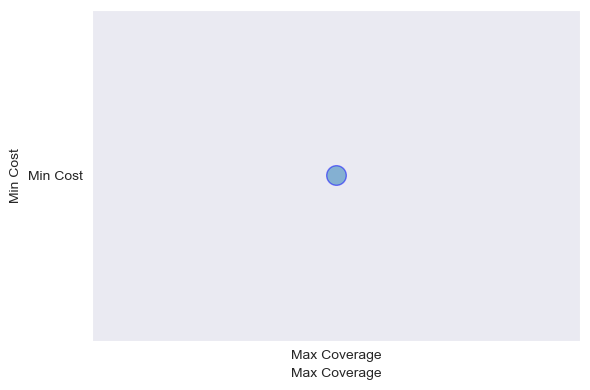

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(data = pareto_front_df_model4b, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200)
plt.xlabel('Max Coverage')
plt.ylabel('Min Cost')
plt.grid(False)
plt.tight_layout()
plt.savefig('../plots/pareto_front.png', transparent=True)

In [ ]:
pareto_front_df_model4b.plot.scatter(x='Max Coverage', y='Min Cost')


In [ ]:
data_pareto_front = pareto_front_df_model4b
fig11 = plt.subplots(1,3)
plt.figure(figsize=(6,4))
plt.scatter(data=data_pareto_front, x='Max Coverage', y='Min Cost',
            alpha=0.5, edgecolors='b', s=200, color='g')
plt.scatter(data=data_pareto_front, x='Max', y='Min',
            alpha=0.5, edgecolors='black', s=200, color='r')
Max = data_pareto_front[['Max']]
Min = data_pareto_front[['Min']]
plt.plot(Max, Min,
            ls='--', alpha=0.5, color='r')
plt.grid(False)
plt.tight_layout()
plt.savefig('Outputs/pareto_frontier_points.png', transparent=True)
plt.show()